In [1]:
import os
import numpy as np
from pathlib import Path
import tables_io
import pandas as pd
import h5py
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
# Various rail modules
import rail
from rail.creation.engines.flowEngine import FlowModeler, FlowCreator, FlowPosterior
from rail.core.data import TableHandle
from rail.core.stage import RailStage
from rail.core.utilStages import ColumnMapper, TableConverter

from rail.estimation.algos.flexzboost import Inform_FZBoost, FZBoost


In [3]:
path_to_star = '/users/irenemoskowitz/DESC/STAR_Challenge'
path_to_buzzard = 'augmentation_paper_plots/catalogs/buzzard_catalog.hdf5'
shifted_buzzard = 'augmentation_paper_plots/catalogs/buzzard_shifted_mags.hdf5'
flowed_catalog = 'augmentation_paper_plots/catalogs/flowed_catalog.hdf5'
augmented_catalog = 'augmentation_paper_plots/catalogs/shifted_mags/fzboost_color_mag_redshift_augmented_training_catalog.hdf5'

In [4]:
dc2_train = pd.read_csv(f'{path_to_star}/nn_class/extended_sources/tpzrun.tpz_train',delimiter=' ', header=0)
dc2_app = pd.read_csv(f'{path_to_star}/nn_class/extended_sources/tpzrun.tpz_app',delimiter=' ', header=0)

buzzard = tables_io.read(path_to_buzzard)
buzzard_data = pd.DataFrame(buzzard['photometry'])

aug_train = tables_io.read(augmented_catalog)
aug_train_data = pd.DataFrame(aug_train['photometry'])

#flowed_buzzard = tables_io.read(flowed_catalog)
#flowed_data = pd.DataFrame(flowed_buzzard['photometry'])

shifted_buzzard = tables_io.read(shifted_buzzard)
shifted_data = pd.DataFrame(shifted_buzzard['photometry'])

In [5]:
mask = (buzzard_data['g'] < 30)  & (buzzard_data['z'] < 30) 
buz_data = buzzard_data[mask]

# Figures 1 and 2: Training Sample vs Application sample

In [6]:
dc2_train_i = dc2_train['i'].to_numpy()
dc2_train_gz = dc2_train['g'].to_numpy() - dc2_train['z'].to_numpy()
dc2_train_ri = dc2_train['r'].to_numpy() - dc2_train['i'].to_numpy()

buzzard_i = buz_data['i'].to_numpy()
buzzard_gz = buz_data['g'].to_numpy() - buz_data['z'].to_numpy()
buzzard_ri = buz_data['r'].to_numpy() - buz_data['i'].to_numpy()

shifted_i = shifted_data['i'].to_numpy()
shifted_gz = shifted_data['g'].to_numpy() - shifted_data['z'].to_numpy()
shifted_ri = shifted_data['r'].to_numpy() - shifted_data['i'].to_numpy()

dc2_app_i = dc2_app['i'].to_numpy()
dc2_app_gz = dc2_app['g'].to_numpy() - dc2_app['z'].to_numpy()
dc2_app_ri = dc2_app['r'].to_numpy() - dc2_app['i'].to_numpy()

aug_train_i = aug_train_data['i'].to_numpy()
aug_train_gz = aug_train_data['g'].to_numpy() - aug_train_data['z'].to_numpy()

In [8]:
matplotlib.scale.get_scale_names()

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']

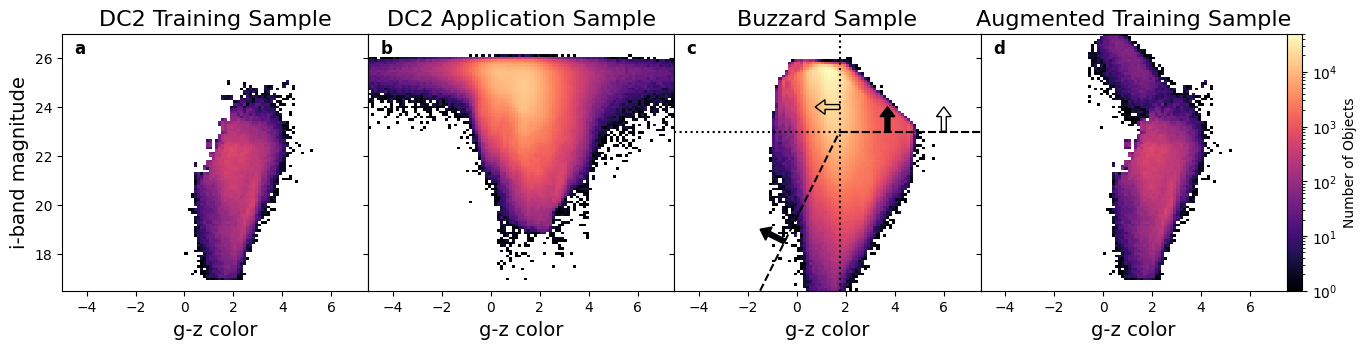

In [29]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(16,4))
#fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,4),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0)

h0 = grid[0].hist2d(dc2_train_gz, dc2_train_i, bins=100, cmin=1, cmap='magma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=50000), range=[[-5,7.5],[16.5, 27]])
grid[0].set_ylabel('i-band magnitude', fontsize=14)
grid[0].set_xlabel('g-z color', fontsize=14)
grid[0].set_title('DC2 Training Sample', fontsize=16)
grid[0].text(-4.5, 26.2, 'a', fontweight='bold', fontsize='large')

h1 = grid[1].hist2d(dc2_app_gz, dc2_app_i, bins=100, cmin=1, cmap='magma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=50000), range=[[-5,7.5],[16.5, 27]])
grid[1].set_xlabel('g-z color', fontsize=14)
grid[1].set_title('DC2 Application Sample', fontsize=16)
grid[1].text(-4.5, 26.2, 'b', fontweight='bold', fontsize='large')

h2 = grid[2].hist2d(buzzard_gz, buzzard_i, bins=100, cmin=1, cmap='magma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=50000), range=[[-5,7.5],[16.5, 27]])
grid[2].axhline(y=23, c='k', linestyle='dotted')
grid[2].arrow(6, 23.01, 0, 1.0, length_includes_head=True, head_length=0.4, width=0.2, linestyle='-', fill=False)
#grid[2].arrow(-3.5, 23.01, 0, 1.5, length_includes_head=True, head_length=0.6, width=0.2, linestyle='-', fill=False)
grid[2].axvline(x=1.75, c='k', linestyle='dotted')
grid[2].arrow(1.749, 24, -1, 0, length_includes_head=True, head_length=0.4, width=0.2, linestyle='-', fill=False)
#grid[2].arrow(1.749, 18, -1.5, 0, length_includes_head=True, head_length=0.6, width=0.2, linestyle='-', fill=False)

x = [-1.5, 0, 1.5, 1.75]
y = [16.5, 19.5, 22.5, 23]
grid[2].hlines(y=23, xmin=1.75, xmax=7.5, color='k', linestyle='dashed')
#grid[0].plot(x, y, 'k', linestyle='dashed')
grid[2].plot(x, y, 'k', linestyle='dashed')
grid[2].arrow(3.7, 23.01, 0, 1, length_includes_head=True, head_length=0.4, width=0.2, linestyle='-', facecolor='black')
grid[2].arrow(-0.5, 18.51, -1, 0.5, length_includes_head=True, head_length=0.4, width=0.2, linestyle='-', facecolor='black')

grid[2].set_xlabel('g-z color', fontsize=14)
grid[2].set_title('Buzzard Sample', fontsize=16)
grid[2].text(-4.5, 26.2, 'c', fontweight='bold', fontsize='large')

h3 = grid[3].hist2d(aug_train_gz, aug_train_i, bins=100, cmin=1, cmap='magma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=50000), range=[[-5,7.5],[16.5, 27]])
grid[3].set_xlabel('g-z color', fontsize=14)
grid[3].set_title('Augmented Training Sample', fontsize=16)
grid[3].text(-4.5, 26.2, 'd', fontweight='bold', fontsize='large')

grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
grid[2].set_rasterized(True)
grid[3].set_rasterized(True)
fig.colorbar(h1[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')

#fig.subplots_adjust(wspace=0.0)
plt.savefig('augmentation_paper_plots/dc2_training_vs_application_vs_buzzard_vs_augmented.png', facecolor='white')
plt.savefig('augmentation_paper_plots/dc2_training_vs_application_vs_buzzard_vs_augmented.pdf', bbox_inches='tight')
plt.show()

## Poster Version

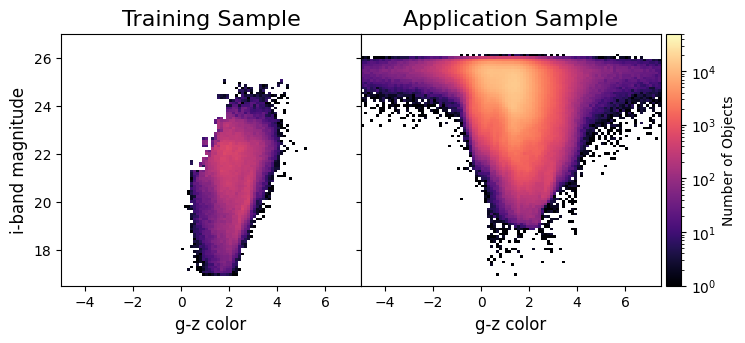

In [18]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(8,4))
#fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,2),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)

h0 = grid[0].hist2d(dc2_train_gz, dc2_train_i, bins=100, cmin=1, cmap='magma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=50000), range=[[-5,7.5],[16.5, 27]])
grid[0].set_ylabel('i-band magnitude', fontsize=12)
grid[0].set_xlabel('g-z color', fontsize=12)
grid[0].set_title('Training Sample', fontsize=16)

h1 = grid[1].hist2d(dc2_app_gz, dc2_app_i, bins=100, cmin=1, cmap='magma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=50000), range=[[-5,7.5],[16.5, 27]])
grid[1].set_xlabel('g-z color', fontsize=12)
grid[1].set_title('Application Sample', fontsize=16)


grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
fig.colorbar(h1[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')

#fig.subplots_adjust(wspace=0.0)
plt.savefig('augmentation_paper_plots/poster_versions/dc2_training_vs_application_.png', facecolor='white')
plt.show()

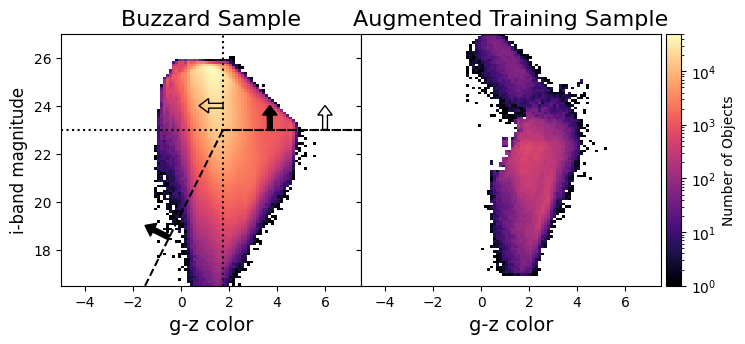

In [34]:
fig = plt.figure(figsize=(8,4))
#fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,2),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)

h2 = grid[0].hist2d(buzzard_gz, buzzard_i, bins=100, cmin=1, cmap='magma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=50000), range=[[-5,7.5],[16.5, 27]])
grid[0].axhline(y=23, c='k', linestyle='dotted')
grid[0].arrow(6, 23.01, 0, 1.0, length_includes_head=True, head_length=0.4, width=0.2, linestyle='-', fill=False)
#grid[2].arrow(-3.5, 23.01, 0, 1.5, length_includes_head=True, head_length=0.6, width=0.2, linestyle='-', fill=False)
grid[0].axvline(x=1.75, c='k', linestyle='dotted')
grid[0].arrow(1.749, 24, -1, 0, length_includes_head=True, head_length=0.4, width=0.2, linestyle='-', fill=False)
#grid[2].arrow(1.749, 18, -1.5, 0, length_includes_head=True, head_length=0.6, width=0.2, linestyle='-', fill=False)

x = [-1.5, 0, 1.5, 1.75]
y = [16.5, 19.5, 22.5, 23]
grid[0].hlines(y=23, xmin=1.75, xmax=7.5, color='k', linestyle='dashed')
#grid[0].plot(x, y, 'k', linestyle='dashed')
grid[0].plot(x, y, 'k', linestyle='dashed')
grid[0].arrow(3.7, 23.01, 0, 1, length_includes_head=True, head_length=0.4, width=0.2, linestyle='-', facecolor='black')
grid[0].arrow(-0.5, 18.51, -1, 0.5, length_includes_head=True, head_length=0.4, width=0.2, linestyle='-', facecolor='black')

grid[0].set_xlabel('g-z color', fontsize=14)
grid[0].set_title('Buzzard Sample', fontsize=16)
grid[0].set_ylabel('i-band magnitude', fontsize=12)

h3 = grid[1].hist2d(aug_train_gz, aug_train_i, bins=100, cmin=1, cmap='magma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=50000), range=[[-5,7.5],[16.5, 27]])
grid[1].set_xlabel('g-z color', fontsize=14)
grid[1].set_title('Augmented Training Sample', fontsize=16)

grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
fig.colorbar(h2[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')
plt.savefig('augmentation_paper_plots/poster_versions/augmented_training_vs_buzzard.png', facecolor='white', bbox_inches='tight')
plt.show()

In [7]:
dc2_train_specz = dc2_train['specz'].to_numpy()
dc2_app_specz = dc2_app['specz'].to_numpy()
buzzard_specz = buz_data['specz'].to_numpy()
augmented_specz = aug_train_data['specz'].to_numpy()
#shifted_specz = shifted_data['specz'].to_numpy()

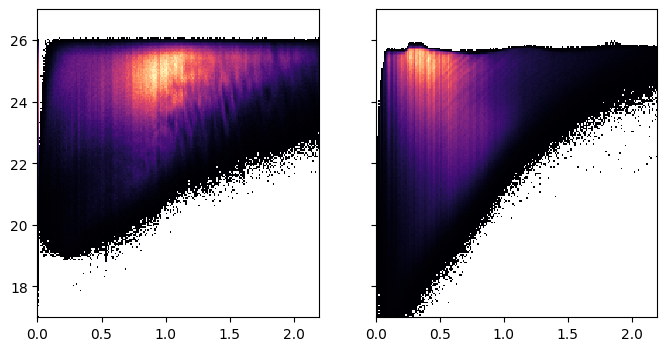

In [11]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 4))

ax[0].hist2d(dc2_app_specz, dc2_app_i, bins=200, cmin=1, cmap='magma', range=[[0,2.2], [17, 27]])
#ax[0].axhline(y=1.75, c='r', linestyle='--')
#ax[0].axvline(x=1.0, c='r', linestyle='--')
ax[1].hist2d(buzzard_specz, buzzard_i, bins=200, cmin=1, cmap='magma', range=[[0,2.2], [17, 27]])
#ax[1].axhline(y=1.75, c='r', linestyle='--')
#ax[1].axvline(x=1.0, c='r', linestyle='--')
plt.show()

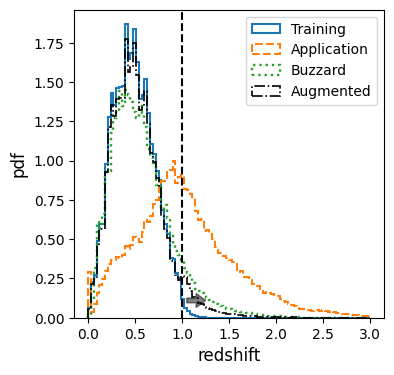

In [27]:
plt.figure(figsize=(4,4))

plt.hist(dc2_train_specz, bins=100, histtype='step', linewidth=1.5, range=[0,3.0], density=True, label='Training')
plt.hist(dc2_app_specz, bins=100, histtype='step', linewidth=1.5, linestyle='--', range=[0,3.0], density=True, label='Application')
plt.hist(buzzard_specz, bins=100, histtype='step', linewidth=1.7, linestyle=':', range=[0,3.0], density=True, label='Buzzard')
plt.hist(augmented_specz, bins=100, histtype='step', linewidth=1.2, color='k', linestyle='-.', range=[0,3.0], density=True, label='Augmented')
plt.axvline(x=1.0, color='k', linestyle='dashed')
plt.arrow(1.05, 0.11, .2, 0, length_includes_head=True, head_length=0.1, width=0.03, color='k', alpha=0.5)
plt.xlabel('redshift', fontsize=12)
plt.ylabel('pdf', fontsize=12)
plt.legend()

plt.savefig('augmentation_paper_plots/training_vs_application_vs_buzzard_vs_augmented_redshifts.png', facecolor='white')
plt.savefig('augmentation_paper_plots/training_vs_application_vs_buzzard_vs_augmented_redshifts.pdf', bbox_inches='tight')
plt.show()

# Figure 3: Representative vs Unaugmented training

## Train Representative Sample

In [5]:
data_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'
data_table = tables_io.read(data_file)
data = pd.DataFrame(data_table['photometry'])
data

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,iz,r,ri,size,specz,u,ug,y,z,zy
0,0.265709,0.294343,0.065172,0.221899,0.126635,0.142422,0.596857,0.653329,0.296248,0.212113,...,0.400972,24.05779,0.726830,1.37057,0.589002,25.02543,-0.402275,22.99856,22.92999,-0.068571
1,0.076845,0.095560,0.026741,0.051276,0.056803,0.062783,0.256366,0.267635,0.071431,0.043750,...,0.686113,22.93367,0.846581,2.12694,0.999547,23.74729,0.175136,21.22587,21.40098,0.175107
2,0.180536,0.187415,0.046138,0.106715,0.050309,0.068263,2.177670,2.185140,0.126338,0.096225,...,0.388178,23.32877,0.704033,1.34182,0.387335,26.68006,1.779700,22.12131,22.23655,0.115246
3,0.331025,0.431263,0.151683,0.344966,0.276424,0.315306,8.473580,8.480050,1.084460,0.309829,...,0.430022,24.62058,0.621974,3.19779,1.715034,27.38192,2.240830,24.05406,23.56858,-0.485481
4,0.289616,0.399928,0.059403,0.208866,0.275799,0.282123,0.269342,0.395503,0.411137,0.200241,...,0.074200,24.65532,1.200760,1.38811,0.824784,24.74905,-0.494577,23.32166,23.38036,0.058706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520453,0.028926,0.042626,0.064517,0.177220,0.031310,0.071713,0.102205,0.106220,0.717934,0.165060,...,-0.104704,24.20727,-0.149967,1.84581,2.290370,24.72785,0.382242,25.36828,24.46194,-0.906345
5520454,0.140034,0.172357,0.119872,0.334889,0.100486,0.156418,0.497563,0.516893,0.591785,0.312700,...,-0.044257,25.88642,0.414821,1.09283,0.640610,26.64029,0.230445,25.32067,25.51585,0.195186
5520455,0.048102,0.072631,0.089373,0.163732,0.054419,0.104637,0.121744,0.130903,0.461739,0.137188,...,0.478558,25.26098,0.120627,1.04954,1.371529,25.13690,-0.190757,25.04124,24.66180,-0.379440
5520456,0.032535,0.045226,0.044211,0.080984,0.031415,0.054236,0.079361,0.085771,0.128423,0.067851,...,0.544235,24.50432,0.249666,1.48199,1.063150,24.51700,-0.220228,23.49994,23.71041,0.210471


In [6]:
gal_inds = data.index.values.tolist()
train_gals = np.random.choice(gal_inds, len(gal_inds), replace=False)
train_data = data.loc[np.sort(train_gals[0:180000])]
train_data

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,iz,r,ri,size,specz,u,ug,y,z,zy
24,0.359297,0.445078,0.167519,0.553469,0.262679,0.311549,1.195620,1.248440,1.390680,0.527509,...,-0.055740,24.87859,0.467501,2.98839,1.000227,25.62314,0.283284,24.41270,24.46683,0.054131
75,0.207943,0.227577,0.058895,0.157618,0.092473,0.109635,0.208062,0.294160,0.271310,0.146201,...,0.103859,24.41666,0.698179,1.19651,0.790042,24.45901,-0.399690,23.40868,23.61462,0.205945
96,2.443420,2.452180,0.144043,0.291069,0.207064,0.252238,0.703676,2.542730,0.669151,0.252928,...,0.489915,25.68108,0.964546,1.15978,0.734015,26.43359,-1.136180,24.44916,24.22662,-0.222539
140,0.073215,0.110789,0.129401,0.265883,0.083150,0.153813,0.139993,0.157983,0.422981,0.232269,...,0.284799,24.65835,0.099727,1.40603,1.339180,24.56492,0.111540,24.12746,24.27382,0.146368
143,0.258794,0.330114,0.128064,0.219109,0.204941,0.241664,0.317994,0.409993,0.943746,0.177787,...,0.523481,25.44795,1.164460,1.77134,0.930654,25.32149,-0.258733,24.80898,23.76001,-1.048970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520211,0.211457,0.217854,0.057772,0.133581,0.052404,0.077999,0.733819,0.763678,0.273730,0.120442,...,0.075278,25.14977,0.568290,1.29894,0.000000,27.09730,0.343025,24.45687,24.50620,0.049322
5520261,0.262470,0.283507,0.130974,0.191940,0.107171,0.169233,1.393590,1.418090,0.295091,0.140311,...,0.842270,25.98721,0.424689,1.19533,0.666882,27.79274,0.669519,24.53144,24.72025,0.188817
5520357,0.033272,0.036370,0.018463,0.039266,0.014689,0.023593,0.134265,0.138326,0.062089,0.034654,...,0.449478,23.28358,0.321946,2.85858,0.510037,24.82867,0.633582,22.49361,22.51216,0.018552
5520365,0.175757,0.193057,0.117814,0.230946,0.079876,0.142339,0.534348,0.562511,0.878207,0.198635,...,0.366857,25.61069,0.253824,1.29257,0.463645,26.68510,0.151147,25.69122,24.99001,-0.701217


In [7]:
app_data = data.loc[np.sort(train_gals[180000:])]
app_data

,eg,egr,ei,eiz,er,eri,eu,eug,ey,ez,...,iz,r,ri,size,specz,u,ug,y,z,zy
0,0.265709,0.294343,0.065172,0.221899,0.126635,0.142422,0.596857,0.653329,0.296248,0.212113,...,0.400972,24.05779,0.726830,1.37057,0.589002,25.02543,-0.402275,22.99856,22.92999,-0.068571
1,0.076845,0.095560,0.026741,0.051276,0.056803,0.062783,0.256366,0.267635,0.071431,0.043750,...,0.686113,22.93367,0.846581,2.12694,0.999547,23.74729,0.175136,21.22587,21.40098,0.175107
2,0.180536,0.187415,0.046138,0.106715,0.050309,0.068263,2.177670,2.185140,0.126338,0.096225,...,0.388178,23.32877,0.704033,1.34182,0.387335,26.68006,1.779700,22.12131,22.23655,0.115246
3,0.331025,0.431263,0.151683,0.344966,0.276424,0.315306,8.473580,8.480050,1.084460,0.309829,...,0.430022,24.62058,0.621974,3.19779,1.715034,27.38192,2.240830,24.05406,23.56858,-0.485481
4,0.289616,0.399928,0.059403,0.208866,0.275799,0.282123,0.269342,0.395503,0.411137,0.200241,...,0.074200,24.65532,1.200760,1.38811,0.824784,24.74905,-0.494577,23.32166,23.38036,0.058706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520453,0.028926,0.042626,0.064517,0.177220,0.031310,0.071713,0.102205,0.106220,0.717934,0.165060,...,-0.104704,24.20727,-0.149967,1.84581,2.290370,24.72785,0.382242,25.36828,24.46194,-0.906345
5520454,0.140034,0.172357,0.119872,0.334889,0.100486,0.156418,0.497563,0.516893,0.591785,0.312700,...,-0.044257,25.88642,0.414821,1.09283,0.640610,26.64029,0.230445,25.32067,25.51585,0.195186
5520455,0.048102,0.072631,0.089373,0.163732,0.054419,0.104637,0.121744,0.130903,0.461739,0.137188,...,0.478558,25.26098,0.120627,1.04954,1.371529,25.13690,-0.190757,25.04124,24.66180,-0.379440
5520456,0.032535,0.045226,0.044211,0.080984,0.031415,0.054236,0.079361,0.085771,0.128423,0.067851,...,0.544235,24.50432,0.249666,1.48199,1.063150,24.51700,-0.220228,23.49994,23.71041,0.210471


In [8]:
rename_dict = {}
bands = ['u', 'g', 'r', 'i', 'z', 'y']
for band in bands:
    rename_dict[f'{band}'] = 'mag_'+band+'_lsst'
    rename_dict[f'e{band}'] = 'mag_err_'+band+'_lsst'
rename_dict['specz'] = 'redshift'

train_data = train_data.rename(columns=rename_dict)
app_data = app_data.rename(columns=rename_dict)
train_data

,mag_err_g_lsst,egr,mag_err_i_lsst,eiz,mag_err_r_lsst,eri,mag_err_u_lsst,eug,mag_err_y_lsst,mag_err_z_lsst,...,iz,mag_r_lsst,ri,size,redshift,mag_u_lsst,ug,mag_y_lsst,mag_z_lsst,zy
24,0.359297,0.445078,0.167519,0.553469,0.262679,0.311549,1.195620,1.248440,1.390680,0.527509,...,-0.055740,24.87859,0.467501,2.98839,1.000227,25.62314,0.283284,24.41270,24.46683,0.054131
75,0.207943,0.227577,0.058895,0.157618,0.092473,0.109635,0.208062,0.294160,0.271310,0.146201,...,0.103859,24.41666,0.698179,1.19651,0.790042,24.45901,-0.399690,23.40868,23.61462,0.205945
96,2.443420,2.452180,0.144043,0.291069,0.207064,0.252238,0.703676,2.542730,0.669151,0.252928,...,0.489915,25.68108,0.964546,1.15978,0.734015,26.43359,-1.136180,24.44916,24.22662,-0.222539
140,0.073215,0.110789,0.129401,0.265883,0.083150,0.153813,0.139993,0.157983,0.422981,0.232269,...,0.284799,24.65835,0.099727,1.40603,1.339180,24.56492,0.111540,24.12746,24.27382,0.146368
143,0.258794,0.330114,0.128064,0.219109,0.204941,0.241664,0.317994,0.409993,0.943746,0.177787,...,0.523481,25.44795,1.164460,1.77134,0.930654,25.32149,-0.258733,24.80898,23.76001,-1.048970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520211,0.211457,0.217854,0.057772,0.133581,0.052404,0.077999,0.733819,0.763678,0.273730,0.120442,...,0.075278,25.14977,0.568290,1.29894,0.000000,27.09730,0.343025,24.45687,24.50620,0.049322
5520261,0.262470,0.283507,0.130974,0.191940,0.107171,0.169233,1.393590,1.418090,0.295091,0.140311,...,0.842270,25.98721,0.424689,1.19533,0.666882,27.79274,0.669519,24.53144,24.72025,0.188817
5520357,0.033272,0.036370,0.018463,0.039266,0.014689,0.023593,0.134265,0.138326,0.062089,0.034654,...,0.449478,23.28358,0.321946,2.85858,0.510037,24.82867,0.633582,22.49361,22.51216,0.018552
5520365,0.175757,0.193057,0.117814,0.230946,0.079876,0.142339,0.534348,0.562511,0.878207,0.198635,...,0.366857,25.61069,0.253824,1.29257,0.463645,26.68510,0.151147,25.69122,24.99001,-0.701217


In [9]:
headers = ['redshift']
for band in bands:
    headers.append('mag_'+band+'_lsst')
    headers.append('mag_err_'+band+'_lsst')
    
train_data = train_data[headers]
app_data = app_data[headers]

train_data

,redshift,mag_u_lsst,mag_err_u_lsst,mag_g_lsst,mag_err_g_lsst,mag_r_lsst,mag_err_r_lsst,mag_i_lsst,mag_err_i_lsst,mag_z_lsst,mag_err_z_lsst,mag_y_lsst,mag_err_y_lsst
24,1.000227,25.62314,1.195620,25.33985,0.359297,24.87859,0.262679,24.41109,0.167519,24.46683,0.527509,24.41270,1.390680
75,0.790042,24.45901,0.208062,24.85870,0.207943,24.41666,0.092473,23.71848,0.058895,23.61462,0.146201,23.40868,0.271310
96,0.734015,26.43359,0.703676,27.56977,2.443420,25.68108,0.207064,24.71653,0.144043,24.22662,0.252928,24.44916,0.669151
140,1.339180,24.56492,0.139993,24.45338,0.073215,24.65835,0.083150,24.55862,0.129401,24.27382,0.232269,24.12746,0.422981
143,0.930654,25.32149,0.317994,25.58022,0.258794,25.44795,0.204941,24.28349,0.128064,23.76001,0.177787,24.80898,0.943746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520211,0.000000,27.09730,0.733819,26.75428,0.211457,25.14977,0.052404,24.58147,0.057772,24.50620,0.120442,24.45687,0.273730
5520261,0.666882,27.79274,1.393590,27.12322,0.262470,25.98721,0.107171,25.56252,0.130974,24.72025,0.140311,24.53144,0.295091
5520357,0.510037,24.82867,0.134265,24.19509,0.033272,23.28358,0.014689,22.96164,0.018463,22.51216,0.034654,22.49361,0.062089
5520365,0.463645,26.68510,0.534348,26.53395,0.175757,25.61069,0.079876,25.35686,0.117814,24.99001,0.198635,25.69122,0.878207


In [10]:
train_data.replace(np.inf, 10, inplace=True)
app_data.replace(np.inf, 10, inplace=True)

/var/folders/hf/gr6v9hmx20l3zz5m4vjln52r0000gn/T/ipykernel_3928/191306007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.replace(np.inf, 10, inplace=True)


In [11]:
DS = RailStage.data_store
DS.__class__.allow_overwrite = True

train_dict = tables_io.convert(train_data, tables_io.types.NUMPY_DICT)
app_dict = tables_io.convert(app_data, tables_io.types.NUMPY_DICT)

training_data = DS.add_data('train_data', train_dict, TableHandle)
testing_data = DS.add_data('test_data', app_dict, TableHandle)

In [12]:
fz_dict = dict(zmin=0.0, zmax=3.0, nzbins=301,
               trainfrac=0.75, seed=123, bumpmin=0.02, bumpmax=0.35,
               nbump=20, sharpmin=0.7, sharpmax=2.1, nsharp=15,
               max_basis=35, basis_system='cosine',
               hdf5_groupname='',
               regression_params={'max_depth': 8,'objective':'reg:squarederror'})

inform_fzboost = Inform_FZBoost.make_stage(
    name='inform_FZBoost', 
    model='fzboost_augmented.pkl',
    **fz_dict
)

In [13]:
%%time
inform_fzboost.inform(training_data)

stacking some data...
read in training data
fit the model...
finding best bump thresh...
finding best sharpen parameter...
Inserting handle into data store.  model_inform_FZBoost: inprogress_fzboost_augmented.pkl, inform_FZBoost
CPU times: user 5min 48s, sys: 11.7 s, total: 6min
Wall time: 10min 16s


In [14]:
pzflex_app = FZBoost.make_stage(name='fzboost_app', hdf5_groupname='',
                            model=inform_fzboost.get_handle('model'),
                            )

UsageError: Line magic function `%%time` not found.


In [15]:
%%time
fzresults_app = pzflex_app.estimate(testing_data)

Process 0 running estimator on chunk 0 - 5340458
Process 0 estimating PZ PDF for rows 0 - 5,340,458
[10:29:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:29:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:30:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:32:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:29:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:3

In [16]:
speczs_app = app_dict['redshift']
pz_app = fzresults_app().mean().flatten()

In [17]:
modes = fzresults_app().mode(grid=np.linspace(0, 3, 301))
sigmas = fzresults_app().std()

lowlims = modes - sigmas
hilims = modes + sigmas
intquant = fzresults_app().integrate(limits=(lowlims, hilims))

zerr = sigmas.flatten()
zconf = intquant.flatten()

/Users/irenemoskowitz/anaconda3/envs/rail2/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1477: RuntimeWarning: invalid value encountered in sqrt
  res = sqrt(self.stats(*args, **kwds))


In [19]:
outfile = 'augmentation_paper_plots/catalogs/representative_application_catalog.hdf5'
outf = h5py.File(outfile, 'w')
group = outf.create_group('photometry')

In [20]:
keys = list(app_data.columns)
for key in keys:
    group[f'{key}'] = app_data[f'{key}']


In [22]:
group2 = outf.create_group('photo_z')
group2['zphot'] = pz_app
group2['zerr'] = zerr
group2['zconf'] = zconf

In [23]:
outf.close()

## Make Plots

In [35]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'
rep_file = 'augmentation_paper_plots/catalogs/representative_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
rep_data = tables_io.read(rep_file)

unaug_pz = pd.DataFrame(pz_data['unaugmented'])
rep_pz = pd.DataFrame(rep_data['photo_z'])


In [36]:
features = pd.DataFrame(pz_data['photometry'])
rep_features = pd.DataFrame(rep_data['photometry'])

unaug_specz = features['specz'].to_numpy()
rep_specz = rep_features['redshift'].to_numpy()

In [37]:
photz_rep = rep_pz['zphot'].to_numpy()
photz_unaug = unaug_pz['zphot'].to_numpy()

In [38]:
### Calculate Outlier Limits and Outlier Fraction
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

outlier_rep = np.abs(rep_specz-photz_rep)/(1+rep_specz)
out_locs_rep = np.where(outlier_rep > 0.15)
outlier_frac_rep = len(out_locs_rep[0])/len(outlier_rep)

outlier_unaug = np.abs(unaug_specz-photz_unaug)/(1+unaug_specz)
out_locs_unaug = np.where(outlier_unaug > 0.15)
outlier_frac_unaug = len(out_locs_unaug[0])/len(outlier_unaug)

photz_err_rep = (photz_rep-rep_specz)/(1+rep_specz)
med_err_rep = np.median(photz_err_rep)
deviations_rep = np.absolute(photz_err_rep - med_err_rep)
nmad_rep = 1.4826*np.median(deviations_rep)

photz_err_unaug = (photz_unaug-unaug_specz)/(1+unaug_specz)
med_err_unaug = np.median(photz_err_unaug)
deviations_unaug = np.absolute(photz_err_unaug - med_err_unaug)
nmad_unaug = 1.4826*np.median(deviations_unaug)

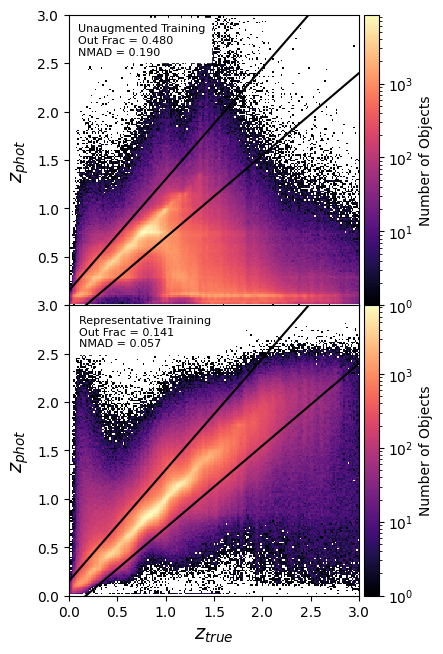

In [39]:
from mpl_toolkits.axes_grid1 import ImageGrid
txt_rep = matplotlib.offsetbox.AnchoredText('\n'.join(('Representative Training', 'Out Frac = %.3f' % outlier_frac_rep, 'NMAD = %.3f' % nmad_rep)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.9, alpha=0.3, frameon=False, loc='upper left', pad=0.0)
txt_unaug = matplotlib.offsetbox.AnchoredText('\n'.join(('Unaugmented Training', 'Out Frac = %.3f' % outlier_frac_unaug, 'NMAD = %.3f' % nmad_unaug)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, alpha=0.7, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(4,8))
#fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,1),
                 axes_pad=0,
                 cbar_mode='each',
                 cbar_location='right',
                 cbar_pad=0.05)

h0 = grid[1].hist2d(rep_specz, photz_rep, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[1].plot(z_list_lo, outlier_line_lo, 'k')
grid[1].plot(z_list_hi, outlier_line_hi, 'k')
grid[1].set_ylabel(r'$z_{phot}$', fontsize=14)
grid[1].set_xlabel(r'$z_{true}$', fontsize=14)
#grid[1].set_title('Representative Training', fontsize=16)
grid[1].add_artist(txt_rep) 

h1 = grid[0].hist2d(unaug_specz, photz_unaug, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].set_ylabel(r'$z_{phot}$', fontsize=14)
grid[0].set_xlabel(r'$z_{true}$', fontsize=14)
#grid[0].set_title('Unaugmented Training', fontsize=16)
grid[0].add_artist(txt_unaug)
grid[0].set_yticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
fig.colorbar(h1[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')
fig.colorbar(h1[3], cax=grid.cbar_axes[1], orientation='vertical', label='Number of Objects')

plt.savefig('augmentation_paper_plots/representative_vs_unaugmented_training.png', facecolor='white', bbox_inches='tight')
#plt.savefig('augmentation_paper_plots/representative_vs_unaugmented_training.pdf', bbox_inches='tight')
plt.show()

## Poster Version

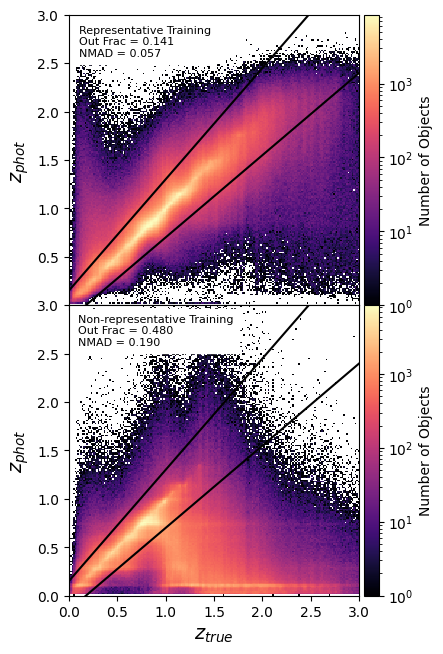

In [19]:
from mpl_toolkits.axes_grid1 import ImageGrid
txt_rep = matplotlib.offsetbox.AnchoredText('\n'.join(('Representative Training', 'Out Frac = %.3f' % outlier_frac_rep, 'NMAD = %.3f' % nmad_rep)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.9, alpha=0.3, frameon=False, loc='upper left', pad=0.0)
txt_unaug = matplotlib.offsetbox.AnchoredText('\n'.join(('Non-representative Training', 'Out Frac = %.3f' % outlier_frac_unaug, 'NMAD = %.3f' % nmad_unaug)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, alpha=0.7, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(4,8))
#fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,1),
                 axes_pad=0,
                 cbar_mode='each',
                 cbar_location='right',
                 cbar_pad=0.05)

h0 = grid[0].hist2d(rep_specz, photz_rep, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].set_ylabel(r'$z_{phot}$', fontsize=14)
grid[0].set_xlabel(r'$z_{true}$', fontsize=14)
#grid[1].set_title('Representative Training', fontsize=16)
grid[0].add_artist(txt_rep) 

h1 = grid[1].hist2d(unaug_specz, photz_unaug, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[1].plot(z_list_lo, outlier_line_lo, 'k')
grid[1].plot(z_list_hi, outlier_line_hi, 'k')
grid[1].set_ylabel(r'$z_{phot}$', fontsize=14)
grid[1].set_xlabel(r'$z_{true}$', fontsize=14)
#grid[0].set_title('Unaugmented Training', fontsize=16)
grid[1].add_artist(txt_unaug)
grid[0].set_yticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
fig.colorbar(h1[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')
fig.colorbar(h1[3], cax=grid.cbar_axes[1], orientation='vertical', label='Number of Objects')

plt.savefig('augmentation_paper_plots/poster_versions/representative_vs_unaugmented_training.png', facecolor='white', bbox_inches='tight')
#plt.savefig('augmentation_paper_plots/representative_vs_unaugmented_training.pdf', bbox_inches='tight')
plt.show()

# Figure 4: Single Feature Augmentation

In [9]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
sing_aug = pd.DataFrame(pz_data['redshift_augmented'])
doub_aug = pd.DataFrame(pz_data['magshifted_color_redshift_augmented'])
trip_aug = pd.DataFrame(pz_data['magshifted_color_mag_redshift_augmented'])

In [10]:
specz = pd.DataFrame(pz_data['photometry'])['specz'].to_numpy()
photz_sing = sing_aug['zphot'].to_numpy()
photz_doub = doub_aug['zphot'].to_numpy()
photz_trip = trip_aug['zphot'].to_numpy()

### calculate outlier fractions and NMADs

In [11]:
outlier_sing = np.where(np.abs(specz-photz_sing)/(1+specz) > 0.15)
out_frac_sing = len(outlier_sing[0])/len(specz)
print('redshift augmented outlier fraction: ', out_frac_sing)

outlier_doub = np.where(np.abs(specz-photz_doub)/(1+specz) > 0.15)
out_frac_doub = len(outlier_doub[0])/len(specz)
print('color+redshift augmented outlier fraction: ', out_frac_doub)

outlier_trip = np.where(np.abs(specz-photz_trip)/(1+specz) > 0.15)
out_frac_trip = len(outlier_trip[0])/len(specz)
print('color+magnitude+redshift augmented outlier fraction: ', out_frac_trip)

redshift augmented outlier fraction:  0.2609807012389189
color+redshift augmented outlier fraction:  0.2576659400361347
color+magnitude+redshift augmented outlier fraction:  0.24545191721411522


In [12]:
photz_err_sing = (photz_sing-specz)/(1+specz)
med_err_sing = np.median(photz_err_sing)
nmad_sing = 1.4826 * np.median(np.absolute(photz_err_sing - med_err_sing))
print('redshift augmented NMAD: ', nmad_sing)

photz_err_doub = (photz_doub-specz)/(1+specz)
med_err_doub = np.median(photz_err_doub)
nmad_doub = 1.4826 * np.median(np.absolute(photz_err_doub - med_err_doub))
print('color+redshift augmented NMAD: ', nmad_doub)

photz_err_trip = (photz_trip-specz)/(1+specz)
med_err_trip = np.median(photz_err_trip)
nmad_trip = 1.4826 * np.median(np.absolute(photz_err_trip - med_err_trip))
print('color+mangitude+redshift augmented NMAD: ', nmad_trip)

redshift augmented NMAD:  0.08710412248589822
color+redshift augmented NMAD:  0.08622380229878347
color+mangitude+redshift augmented NMAD:  0.08350858356784176


In [13]:
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

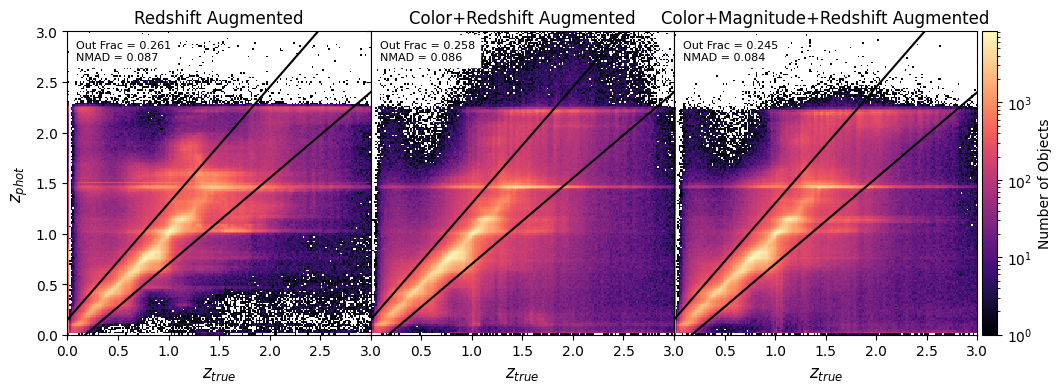

In [17]:
txt_sing = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_sing, 'NMAD = %.3f' % nmad_sing)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_doub = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_doub, 'NMAD = %.3f' % nmad_doub)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_trip = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_trip, 'NMAD = %.3f' % nmad_trip)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(12,4))
#fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,3),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)


h0 = grid[0].hist2d(specz, photz_sing, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].add_artist(txt_sing)                                
grid[0].set_xlabel(r'$z_{true}$', fontsize=12)
grid[0].set_ylabel(r'$z_{phot}$', fontsize=12)
grid[0].set_title('Redshift Augmented', fontsize=12)

h1 = grid[1].hist2d(specz, photz_doub, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[1].plot(z_list_lo, outlier_line_lo, 'k')
grid[1].plot(z_list_hi, outlier_line_hi, 'k')
grid[1].add_artist(txt_doub)                                
grid[1].set_xlabel(r'$z_{true}$', fontsize=12)
grid[1].set_title('Color+Redshift Augmented', fontsize=12)
grid[1].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

h2 = grid[2].hist2d(specz, photz_trip, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[2].plot(z_list_lo, outlier_line_lo, 'k')
grid[2].plot(z_list_hi, outlier_line_hi, 'k')
grid[2].add_artist(txt_trip)                                
grid[2].set_xlabel(r'$z_{true}$', fontsize=12)
grid[2].set_title('Color+Magnitude+Redshift Augmented', fontsize=12)
grid[2].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
grid[2].set_rasterized(True)
fig.colorbar(h1[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')


plt.savefig('augmentation_paper_plots/best_case_ztrue_vs_zphot.png', facecolor='white', bbox_inches='tight')
plt.savefig('augmentation_paper_plots/best_case_ztrue_vs_zphot.pdf', bbox_inches='tight')
plt.show()

## Unshifted colors

In [41]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
red_aug = pd.DataFrame(pz_data['redshift_augmented'])
mag_aug = pd.DataFrame(pz_data['mag_augmented'])
col_aug = pd.DataFrame(pz_data['color_augmented'])
pz_data.keys()

odict_keys(['color_augmented', 'color_mag_augmented', 'color_mag_redshift_augmented', 'color_redshift_augmented', 'flowed_color_augmented', 'flowed_color_mag_augmented', 'flowed_color_redshift_augmented', 'flowed_mag_augmented', 'flowed_mag_redshift_augmented', 'flowed_redshift_augmented', 'mag_augmented', 'mag_redshift_augmented', 'photometry', 'redshift_augmented', 'representative', 'shifted_color_augmented', 'shifted_color_mag_augmented', 'shifted_color_mag_redshift_augmented', 'shifted_color_redshift_augmented', 'shifted_mag_augmented', 'shifted_mag_redshift_augmented', 'shifted_redshift_augmented', 'unaugmented'])

In [42]:
features = pd.DataFrame(pz_data['photometry'])
specz = features['specz'].to_numpy()

In [43]:
photz_mag = mag_aug['zphot'].to_numpy()
photz_red = red_aug['zphot'].to_numpy()
photz_col = col_aug['zphot'].to_numpy()

### calculate outlier fractions and NMADs

In [44]:
outlier_red = np.where(np.abs(specz-photz_red)/(1+specz) > 0.15)
out_frac_red = len(outlier_red[0])/len(specz)
print('redshift augmented outlier fraction: ', out_frac_red)

outlier_mag = np.where(np.abs(specz-photz_mag)/(1+specz) > 0.15)
out_frac_mag = len(outlier_mag[0])/len(specz)
print('magnitude augmented outlier fraction: ', out_frac_mag)

outlier_col = np.where(np.abs(specz-photz_col)/(1+specz) > 0.15)
out_frac_col = len(outlier_col[0])/len(specz)
print('color augmented outlier fraction: ', out_frac_col)

redshift augmented outlier fraction:  0.2609807012389189
magnitude augmented outlier fraction:  0.31791528891262283
color augmented outlier fraction:  0.324275268465044


In [45]:
photz_err_red = (photz_red-specz)/(1+specz)
med_err_red = np.median(photz_err_red)
nmad_red = 1.4826 * np.median(np.absolute(photz_err_red - med_err_red))
print('redshift augmented NMAD: ', nmad_red)

photz_err_mag = (photz_mag-specz)/(1+specz)
med_err_mag = np.median(photz_err_mag)
nmad_mag = 1.4826 * np.median(np.absolute(photz_err_mag - med_err_mag))
print('magnitude augmented NMAD: ', nmad_mag)

photz_err_col = (photz_col-specz)/(1+specz)
med_err_col = np.median(photz_err_col)
nmad_col = 1.4826 * np.median(np.absolute(photz_err_col - med_err_col))
print('color augmented NMAD: ', nmad_col)

redshift augmented NMAD:  0.08710412248589822
magnitude augmented NMAD:  0.09691189876217889
color augmented NMAD:  0.09926048527675607


In [46]:
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

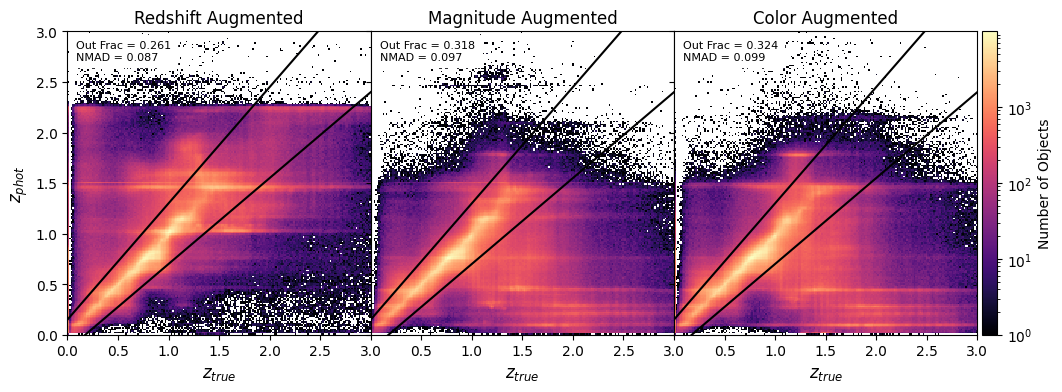

In [48]:
txt_red = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_red, 'NMAD = %.3f' % nmad_red)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_mag = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_mag, 'NMAD = %.3f' % nmad_mag)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_col = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_col, 'NMAD = %.3f' % nmad_col)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(12,4))
#fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,3),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)


h0 = grid[0].hist2d(specz, photz_red, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].add_artist(txt_red)                                
grid[0].set_xlabel(r'$z_{true}$', fontsize=12)
grid[0].set_ylabel(r'$z_{phot}$', fontsize=12)
grid[0].set_title('Redshift Augmented', fontsize=12)

h1 = grid[1].hist2d(specz, photz_mag, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[1].plot(z_list_lo, outlier_line_lo, 'k')
grid[1].plot(z_list_hi, outlier_line_hi, 'k')
grid[1].add_artist(txt_mag)                                
grid[1].set_xlabel(r'$z_{true}$', fontsize=12)
grid[1].set_title('Magnitude Augmented', fontsize=12)
grid[1].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

h2 = grid[2].hist2d(specz, photz_col, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[2].plot(z_list_lo, outlier_line_lo, 'k')
grid[2].plot(z_list_hi, outlier_line_hi, 'k')
grid[2].add_artist(txt_col)                                
grid[2].set_xlabel(r'$z_{true}$', fontsize=12)
grid[2].set_title('Color Augmented', fontsize=12)
grid[2].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
grid[2].set_rasterized(True)
fig.colorbar(h1[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')


plt.savefig('augmentation_paper_plots/unshifted_training_samples/single_feature_augmentation_ztrue_vs_zphot.png', facecolor='white')
plt.savefig('augmentation_paper_plots/unshifted_training_samples/single_feature_augmentation_ztrue_vs_zphot.pdf', bbox_inches='tight')
plt.show()

## Simple shifted colors

In [4]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
red_aug = pd.DataFrame(pz_data['nmadshifted_redshift_augmented'])
mag_aug = pd.DataFrame(pz_data['nmadshifted_mag_augmented'])
col_aug = pd.DataFrame(pz_data['nmadshifted_color_augmented'])
pz_data.keys()

odict_keys(['color_augmented', 'color_mag_augmented', 'color_mag_redshift_augmented', 'color_redshift_augmented', 'flowed_color_augmented', 'flowed_color_mag_augmented', 'flowed_color_mag_redshift_augmented', 'flowed_color_redshift_augmented', 'flowed_mag_augmented', 'flowed_mag_redshift_augmented', 'flowed_redshift_augmented', 'mag_augmented', 'mag_redshift_augmented', 'magshifted_color_augmented', 'magshifted_color_mag_augmented', 'magshifted_color_mag_redshift_augmented', 'magshifted_color_redshift_augmented', 'magshifted_mag_augmented', 'magshifted_mag_redshift_augmented', 'magshifted_redshift_augmented', 'nmadshifted_color_augmented', 'nmadshifted_color_mag_augmented', 'nmadshifted_color_mag_redshift_augmented', 'nmadshifted_color_redshift_augmented', 'nmadshifted_mag_augmented', 'nmadshifted_mag_redshift_augmented', 'nmadshifted_redshift_augmented', 'photometry', 'redshift_augmented', 'representative', 'shifted_color_augmented', 'shifted_color_mag_augmented', 'shifted_color_mag_r

In [5]:
features = pd.DataFrame(pz_data['photometry'])
specz = features['specz'].to_numpy()

In [6]:
photz_mag = mag_aug['zphot'].to_numpy()
photz_red = red_aug['zphot'].to_numpy()
photz_col = col_aug['zphot'].to_numpy()

### calculate outlier fractions and NMADs

In [7]:
outlier_red = np.where(np.abs(specz-photz_red)/(1+specz) > 0.15)
out_frac_red = len(outlier_red[0])/len(specz)
print('redshift augmented outlier fraction: ', out_frac_red)

outlier_mag = np.where(np.abs(specz-photz_mag)/(1+specz) > 0.15)
out_frac_mag = len(outlier_mag[0])/len(specz)
print('magnitude augmented outlier fraction: ', out_frac_mag)

outlier_col = np.where(np.abs(specz-photz_col)/(1+specz) > 0.15)
out_frac_col = len(outlier_col[0])/len(specz)
print('color augmented outlier fraction: ', out_frac_col)

redshift augmented outlier fraction:  0.25559853910671904
magnitude augmented outlier fraction:  0.4129577654607643
color augmented outlier fraction:  0.4202062582488627


In [8]:
photz_err_red = (photz_red-specz)/(1+specz)
med_err_red = np.median(photz_err_red)
nmad_red = 1.4826 * np.median(np.absolute(photz_err_red - med_err_red))
print('redshift augmented NMAD: ', nmad_red)

photz_err_mag = (photz_mag-specz)/(1+specz)
med_err_mag = np.median(photz_err_mag)
nmad_mag = 1.4826 * np.median(np.absolute(photz_err_mag - med_err_mag))
print('magnitude augmented NMAD: ', nmad_mag)

photz_err_col = (photz_col-specz)/(1+specz)
med_err_col = np.median(photz_err_col)
nmad_col = 1.4826 * np.median(np.absolute(photz_err_col - med_err_col))
print('color augmented NMAD: ', nmad_col)

redshift augmented NMAD:  0.0856237709590045
magnitude augmented NMAD:  0.1434873836168364
color augmented NMAD:  0.1488805444864211


In [9]:
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

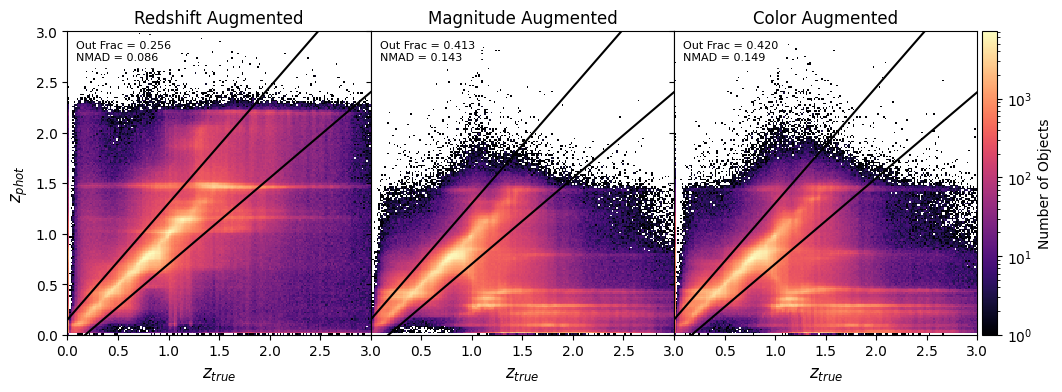

In [10]:
txt_red = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_red, 'NMAD = %.3f' % nmad_red)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_mag = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_mag, 'NMAD = %.3f' % nmad_mag)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_col = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_col, 'NMAD = %.3f' % nmad_col)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(12,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,3),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)

h0 = grid[0].hist2d(specz, photz_red, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].add_artist(txt_red)                                
grid[0].set_xlabel(r'$z_{true}$', fontsize=12)
grid[0].set_ylabel(r'$z_{phot}$', fontsize=12)
grid[0].set_title('Redshift Augmented', fontsize=12)

grid[1].hist2d(specz, photz_mag, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[1].plot(z_list_lo, outlier_line_lo, 'k')
grid[1].plot(z_list_hi, outlier_line_hi, 'k')
grid[1].add_artist(txt_mag)                                
grid[1].set_xlabel(r'$z_{true}$', fontsize=12)
grid[1].set_title('Magnitude Augmented', fontsize=12)
grid[1].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[2].hist2d(specz, photz_col, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[2].plot(z_list_lo, outlier_line_lo, 'k')
grid[2].plot(z_list_hi, outlier_line_hi, 'k')
grid[2].add_artist(txt_col)                                
grid[2].set_xlabel(r'$z_{true}$', fontsize=12)
grid[2].set_title('Color Augmented', fontsize=12)
grid[2].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
grid[2].set_rasterized(True)
fig.colorbar(h0[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')

plt.savefig('augmentation_paper_plots/mag_nmad_shifted_training_samples/single_feature_augmentation_ztrue_vs_zphot.png', facecolor='white')
plt.savefig('augmentation_paper_plots/mag_nmad_shifted_training_samples/single_feature_augmentation_ztrue_vs_zphot.pdf', bbox_inches='tight')
plt.show()

## Flowed colors

In [4]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
red_aug = pd.DataFrame(pz_data['magshifted_flowed_redshift_augmented'])
mag_aug = pd.DataFrame(pz_data['magshifted_flowed_mag_augmented'])
col_aug = pd.DataFrame(pz_data['magshifted_flowed_color_augmented'])
pz_data.keys()

odict_keys(['color_augmented', 'color_mag_augmented', 'color_mag_redshift_augmented', 'color_redshift_augmented', 'flowed_color_augmented', 'flowed_color_mag_augmented', 'flowed_color_mag_redshift_augmented', 'flowed_color_redshift_augmented', 'flowed_mag_augmented', 'flowed_mag_redshift_augmented', 'flowed_redshift_augmented', 'mag_augmented', 'mag_redshift_augmented', 'magshifted_color_augmented', 'magshifted_color_mag_augmented', 'magshifted_color_mag_redshift_augmented', 'magshifted_color_redshift_augmented', 'magshifted_flowed_color_augmented', 'magshifted_flowed_color_mag_augmented', 'magshifted_flowed_color_mag_redshift_augmented', 'magshifted_flowed_color_redshift_augmented', 'magshifted_flowed_mag_augmented', 'magshifted_flowed_mag_redshift_augmented', 'magshifted_flowed_redshift_augmented', 'magshifted_mag_augmented', 'magshifted_mag_redshift_augmented', 'magshifted_redshift_augmented', 'nmadshifted_color_augmented', 'nmadshifted_color_mag_augmented', 'nmadshifted_color_mag_r

In [5]:
features = pd.DataFrame(pz_data['photometry'])
specz = features['specz'].to_numpy()

In [6]:
photz_mag = mag_aug['zphot'].to_numpy()
photz_red = red_aug['zphot'].to_numpy()
photz_col = col_aug['zphot'].to_numpy()

### calculate outlier fractions and NMADs

In [7]:
outlier_red = np.where(np.abs(specz-photz_red)/(1+specz) > 0.15)
out_frac_red = len(outlier_red[0])/len(specz)
print('redshift augmented outlier fraction: ', out_frac_red)

outlier_mag = np.where(np.abs(specz-photz_mag)/(1+specz) > 0.15)
out_frac_mag = len(outlier_mag[0])/len(specz)
print('magnitude augmented outlier fraction: ', out_frac_mag)

outlier_col = np.where(np.abs(specz-photz_col)/(1+specz) > 0.15)
out_frac_col = len(outlier_col[0])/len(specz)
print('color augmented outlier fraction: ', out_frac_col)

redshift augmented outlier fraction:  0.2983982488409476
magnitude augmented outlier fraction:  0.4320255674438606
color augmented outlier fraction:  0.43207701245077856


In [8]:
photz_err_red = (photz_red-specz)/(1+specz)
med_err_red = np.median(photz_err_red)
nmad_red = 1.4826 * np.median(np.absolute(photz_err_red - med_err_red))
print('redshift augmented NMAD: ', nmad_red)

photz_err_mag = (photz_mag-specz)/(1+specz)
med_err_mag = np.median(photz_err_mag)
nmad_mag = 1.4826 * np.median(np.absolute(photz_err_mag - med_err_mag))
print('magnitude augmented NMAD: ', nmad_mag)

photz_err_col = (photz_col-specz)/(1+specz)
med_err_col = np.median(photz_err_col)
nmad_col = 1.4826 * np.median(np.absolute(photz_err_col - med_err_col))
print('color augmented NMAD: ', nmad_col)

redshift augmented NMAD:  0.10599378890846946
magnitude augmented NMAD:  0.15873761503768172
color augmented NMAD:  0.1569916112264015


In [9]:
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

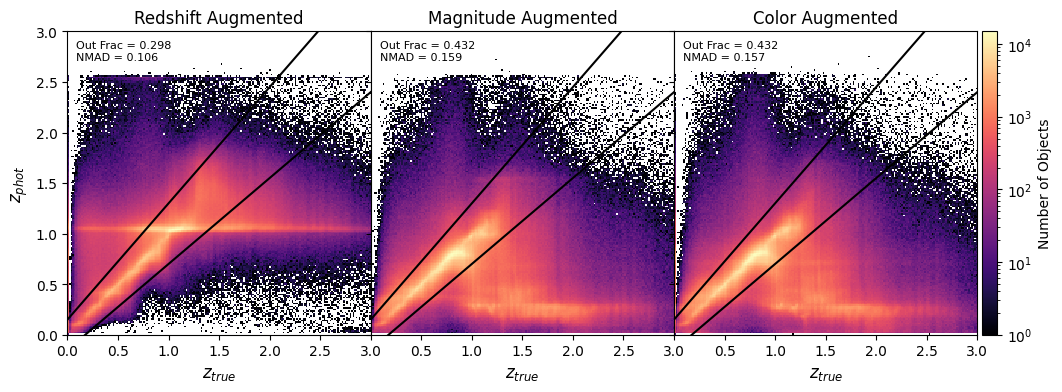

In [10]:
txt_red = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_red, 'NMAD = %.3f' % nmad_red)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_mag = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_mag, 'NMAD = %.3f' % nmad_mag)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_col = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_col, 'NMAD = %.3f' % nmad_col)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(12,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,3),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)

h0 = grid[0].hist2d(specz, photz_red, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].add_artist(txt_red)                                
grid[0].set_xlabel(r'$z_{true}$', fontsize=12)
grid[0].set_ylabel(r'$z_{phot}$', fontsize=12)
grid[0].set_title('Redshift Augmented', fontsize=12)

grid[1].hist2d(specz, photz_mag, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[1].plot(z_list_lo, outlier_line_lo, 'k')
grid[1].plot(z_list_hi, outlier_line_hi, 'k')
grid[1].add_artist(txt_mag)                                
grid[1].set_xlabel(r'$z_{true}$', fontsize=12)
grid[1].set_title('Magnitude Augmented', fontsize=12)
grid[1].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[2].hist2d(specz, photz_col, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[2].plot(z_list_lo, outlier_line_lo, 'k')
grid[2].plot(z_list_hi, outlier_line_hi, 'k')
grid[2].add_artist(txt_col)                                
grid[2].set_xlabel(r'$z_{true}$', fontsize=12)
grid[2].set_title('Color Augmented', fontsize=12)
grid[2].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
grid[2].set_rasterized(True)
fig.colorbar(h0[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')

plt.savefig('augmentation_paper_plots/magshifted_flowed_training_samples/single_feature_augmentation_ztrue_vs_zphot.png', facecolor='white')
plt.savefig('augmentation_paper_plots/magshifted_flowed_training_samples/single_feature_augmentation_ztrue_vs_zphot.pdf', bbox_inches='tight')
plt.show()

# Figure 5: Double Feature Augmentations

## Unshifted colors

In [65]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
mag_red_aug = pd.DataFrame(pz_data['mag_redshift_augmented'])
col_mag_aug = pd.DataFrame(pz_data['color_mag_augmented'])
col_red_aug = pd.DataFrame(pz_data['color_redshift_augmented'])
#pz_data.keys()

In [66]:
features = pd.DataFrame(pz_data['photometry'])
specz = features['specz'].to_numpy()

In [67]:
photz_mag_red = mag_red_aug['zphot'].to_numpy()
photz_col_red = col_red_aug['zphot'].to_numpy()
photz_col_mag = col_mag_aug['zphot'].to_numpy()

### calculate outlier fractions and NMADs

In [68]:
outlier_col_red = np.where(np.abs(specz-photz_col_red)/(1+specz) > 0.15)
out_frac_col_red = len(outlier_col_red[0])/len(specz)
print('color+redshift augmented outlier fraction: ', out_frac_col_red)

outlier_mag_red = np.where(np.abs(specz-photz_mag_red)/(1+specz) > 0.15)
out_frac_mag_red = len(outlier_mag_red[0])/len(specz)
print('magnitude+redshift augmented outlier fraction: ', out_frac_mag_red)

outlier_col_mag = np.where(np.abs(specz-photz_col_mag)/(1+specz) > 0.15)
out_frac_col_mag = len(outlier_col_mag[0])/len(specz)
print('color+magnitude augmented outlier fraction: ', out_frac_col_mag)

color+redshift augmented outlier fraction:  0.2707242768625357
magnitude+redshift augmented outlier fraction:  0.26777814449453285
color+magnitude augmented outlier fraction:  0.3108972117893117


In [69]:
photz_err_col_red = (photz_col_red-specz)/(1+specz)
med_err_col_red = np.median(photz_err_col_red)
nmad_col_red = 1.4826 * np.median(np.absolute(photz_err_col_red - med_err_col_red))
print('color+redshift augmented NMAD: ', nmad_col_red)

photz_err_mag_red = (photz_mag_red-specz)/(1+specz)
med_err_mag_red = np.median(photz_err_mag_red)
nmad_mag_red = 1.4826 * np.median(np.absolute(photz_err_mag_red - med_err_mag_red))
print('magnitude+redshift augmented NMAD: ', nmad_mag_red)

photz_err_col_mag = (photz_col_mag-specz)/(1+specz)
med_err_col_mag = np.median(photz_err_col_mag)
nmad_col_mag = 1.4826 * np.median(np.absolute(photz_err_col_mag - med_err_col_mag))
print('color_magnitude augmented NMAD: ', nmad_col_mag)

color+redshift augmented NMAD:  0.08962823417059625
magnitude+redshift augmented NMAD:  0.09045783640702132
color_magnitude augmented NMAD:  0.0927530381985673


In [70]:
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

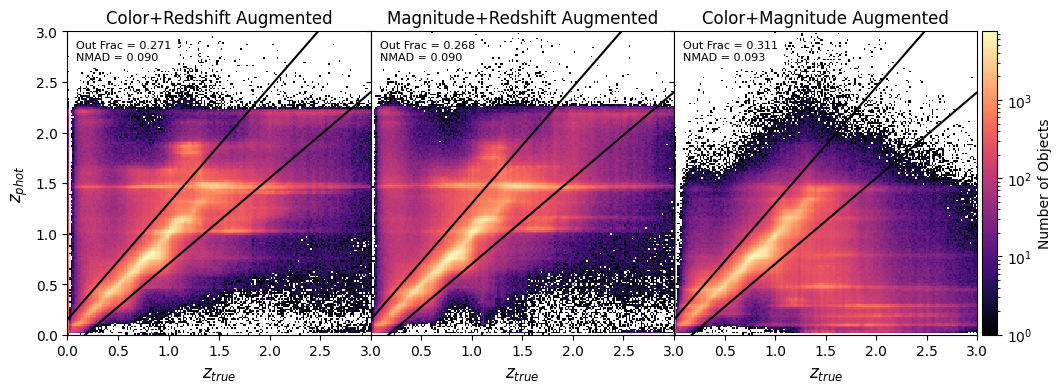

In [71]:
txt_col_red = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_col_red, 'NMAD = %.3f' % nmad_col_red)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_mag_red = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_mag_red, 'NMAD = %.3f' % nmad_mag_red)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_col_mag = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_col_mag, 'NMAD = %.3f' % nmad_col_mag)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(12,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,3),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)

h0 = grid[0].hist2d(specz, photz_col_red, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].add_artist(txt_col_red)                                
grid[0].set_xlabel(r'$z_{true}$', fontsize=12)
grid[0].set_ylabel(r'$z_{phot}$', fontsize=12)
grid[0].set_title('Color+Redshift Augmented', fontsize=12)

grid[1].hist2d(specz, photz_mag_red, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[1].plot(z_list_lo, outlier_line_lo, 'k')
grid[1].plot(z_list_hi, outlier_line_hi, 'k')
grid[1].add_artist(txt_mag_red)                                
grid[1].set_xlabel(r'$z_{true}$', fontsize=12)
grid[1].set_title('Magnitude+Redshift Augmented', fontsize=12)
grid[1].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[2].hist2d(specz, photz_col_mag, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[2].plot(z_list_lo, outlier_line_lo, 'k')
grid[2].plot(z_list_hi, outlier_line_hi, 'k')
grid[2].add_artist(txt_col_mag)                                
grid[2].set_xlabel(r'$z_{true}$', fontsize=12)
grid[2].set_title('Color+Magnitude Augmented', fontsize=12)
grid[2].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
grid[2].set_rasterized(True)
fig.colorbar(h0[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')

plt.savefig('augmentation_paper_plots/unshifted_training_samples/double_feature_augmentation_ztrue_vs_zphot.png', facecolor='white')
plt.savefig('augmentation_paper_plots/unshifted_training_samples/double_feature_augmentation_ztrue_vs_zphot.pdf', bbox_inches='tight')
plt.show()

## Shifted colors

In [11]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
mag_red_aug = pd.DataFrame(pz_data['nmadshifted_mag_redshift_augmented'])
col_mag_aug = pd.DataFrame(pz_data['nmadshifted_color_mag_augmented'])
col_red_aug = pd.DataFrame(pz_data['nmadshifted_color_redshift_augmented'])
#pz_data.keys()

In [12]:
features = pd.DataFrame(pz_data['photometry'])
specz = features['specz'].to_numpy()

In [13]:
photz_mag_red = mag_red_aug['zphot'].to_numpy()
photz_col_red = col_red_aug['zphot'].to_numpy()
photz_col_mag = col_mag_aug['zphot'].to_numpy()

### calculate outlier fractions and NMADs

In [14]:
outlier_col_red = np.where(np.abs(specz-photz_col_red)/(1+specz) > 0.15)
out_frac_col_red = len(outlier_col_red[0])/len(specz)
print('color+redshift augmented outlier fraction: ', out_frac_col_red)

outlier_mag_red = np.where(np.abs(specz-photz_mag_red)/(1+specz) > 0.15)
out_frac_mag_red = len(outlier_mag_red[0])/len(specz)
print('magnitude+redshift augmented outlier fraction: ', out_frac_mag_red)

outlier_col_mag = np.where(np.abs(specz-photz_col_mag)/(1+specz) > 0.15)
out_frac_col_mag = len(outlier_col_mag[0])/len(specz)
print('color+magnitude augmented outlier fraction: ', out_frac_col_mag)

color+redshift augmented outlier fraction:  0.24950194349816626
magnitude+redshift augmented outlier fraction:  0.2520687595123448
color+magnitude augmented outlier fraction:  0.4142083863331629


In [15]:
photz_err_col_red = (photz_col_red-specz)/(1+specz)
med_err_col_red = np.median(photz_err_col_red)
nmad_col_red = 1.4826 * np.median(np.absolute(photz_err_col_red - med_err_col_red))
print('color+redshift augmented NMAD: ', nmad_col_red)

photz_err_mag_red = (photz_mag_red-specz)/(1+specz)
med_err_mag_red = np.median(photz_err_mag_red)
nmad_mag_red = 1.4826 * np.median(np.absolute(photz_err_mag_red - med_err_mag_red))
print('magnitude+redshift augmented NMAD: ', nmad_mag_red)

photz_err_col_mag = (photz_col_mag-specz)/(1+specz)
med_err_col_mag = np.median(photz_err_col_mag)
nmad_col_mag = 1.4826 * np.median(np.absolute(photz_err_col_mag - med_err_col_mag))
print('color_magnitude augmented NMAD: ', nmad_col_mag)

color+redshift augmented NMAD:  0.08275868104333568
magnitude+redshift augmented NMAD:  0.08418261014025549
color_magnitude augmented NMAD:  0.14482904490851425


In [16]:
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

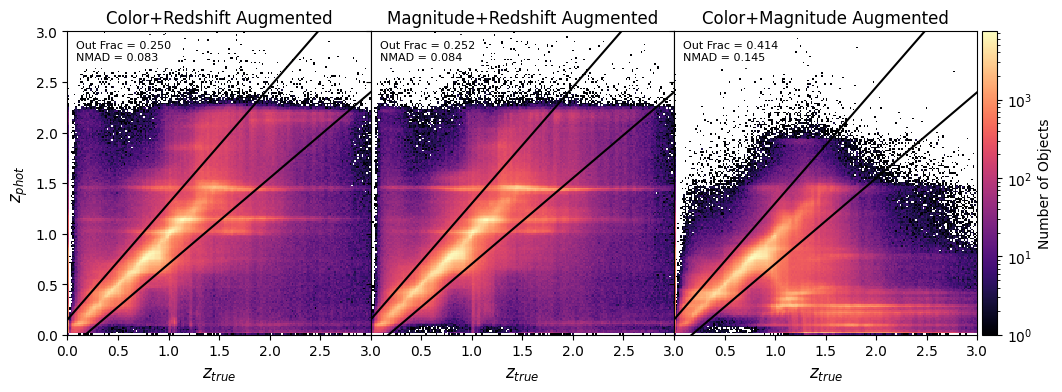

In [17]:
txt_col_red = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_col_red, 'NMAD = %.3f' % nmad_col_red)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_mag_red = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_mag_red, 'NMAD = %.3f' % nmad_mag_red)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_col_mag = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_col_mag, 'NMAD = %.3f' % nmad_col_mag)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(12,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,3),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)

h0 = grid[0].hist2d(specz, photz_col_red, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].add_artist(txt_col_red)                                
grid[0].set_xlabel(r'$z_{true}$', fontsize=12)
grid[0].set_ylabel(r'$z_{phot}$', fontsize=12)
grid[0].set_title('Color+Redshift Augmented', fontsize=12)

grid[1].hist2d(specz, photz_mag_red, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[1].plot(z_list_lo, outlier_line_lo, 'k')
grid[1].plot(z_list_hi, outlier_line_hi, 'k')
grid[1].add_artist(txt_mag_red)                                
grid[1].set_xlabel(r'$z_{true}$', fontsize=12)
grid[1].set_title('Magnitude+Redshift Augmented', fontsize=12)
grid[1].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[2].hist2d(specz, photz_col_mag, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[2].plot(z_list_lo, outlier_line_lo, 'k')
grid[2].plot(z_list_hi, outlier_line_hi, 'k')
grid[2].add_artist(txt_col_mag)                                
grid[2].set_xlabel(r'$z_{true}$', fontsize=12)
grid[2].set_title('Color+Magnitude Augmented', fontsize=12)
grid[2].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
grid[2].set_rasterized(True)
fig.colorbar(h0[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')

plt.savefig('augmentation_paper_plots/mag_nmad_shifted_training_samples/double_feature_augmentation_ztrue_vs_zphot.png', facecolor='white')
plt.savefig('augmentation_paper_plots/mag_nmad_shifted_training_samples/double_feature_augmentation_ztrue_vs_zphot.pdf', bbox_inches='tight')
plt.show()

## Flowed colors

In [11]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
mag_red_aug = pd.DataFrame(pz_data['magshifted_flowed_mag_redshift_augmented'])
col_mag_aug = pd.DataFrame(pz_data['magshifted_flowed_color_mag_augmented'])
col_red_aug = pd.DataFrame(pz_data['magshifted_flowed_color_redshift_augmented'])
#pz_data.keys()

In [12]:
features = pd.DataFrame(pz_data['photometry'])
specz = features['specz'].to_numpy()

In [13]:
photz_mag_red = mag_red_aug['zphot'].to_numpy()
photz_col_red = col_red_aug['zphot'].to_numpy()
photz_col_mag = col_mag_aug['zphot'].to_numpy()

### calculate outlier fractions and NMADs

In [14]:
outlier_col_red = np.where(np.abs(specz-photz_col_red)/(1+specz) > 0.15)
out_frac_col_red = len(outlier_col_red[0])/len(specz)
print('color+redshift augmented outlier fraction: ', out_frac_col_red)

outlier_mag_red = np.where(np.abs(specz-photz_mag_red)/(1+specz) > 0.15)
out_frac_mag_red = len(outlier_mag_red[0])/len(specz)
print('magnitude+redshift augmented outlier fraction: ', out_frac_mag_red)

outlier_col_mag = np.where(np.abs(specz-photz_col_mag)/(1+specz) > 0.15)
out_frac_col_mag = len(outlier_col_mag[0])/len(specz)
print('color+magnitude augmented outlier fraction: ', out_frac_col_mag)

color+redshift augmented outlier fraction:  0.2859309861609309
magnitude+redshift augmented outlier fraction:  0.29711683342215445
color+magnitude augmented outlier fraction:  0.43085899756868


In [15]:
photz_err_col_red = (photz_col_red-specz)/(1+specz)
med_err_col_red = np.median(photz_err_col_red)
nmad_col_red = 1.4826 * np.median(np.absolute(photz_err_col_red - med_err_col_red))
print('color+redshift augmented NMAD: ', nmad_col_red)

photz_err_mag_red = (photz_mag_red-specz)/(1+specz)
med_err_mag_red = np.median(photz_err_mag_red)
nmad_mag_red = 1.4826 * np.median(np.absolute(photz_err_mag_red - med_err_mag_red))
print('magnitude+redshift augmented NMAD: ', nmad_mag_red)

photz_err_col_mag = (photz_col_mag-specz)/(1+specz)
med_err_col_mag = np.median(photz_err_col_mag)
nmad_col_mag = 1.4826 * np.median(np.absolute(photz_err_col_mag - med_err_col_mag))
print('color_magnitude augmented NMAD: ', nmad_col_mag)

color+redshift augmented NMAD:  0.1036763905752557
magnitude+redshift augmented NMAD:  0.10688998397126387
color_magnitude augmented NMAD:  0.15619977726076967


In [16]:
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

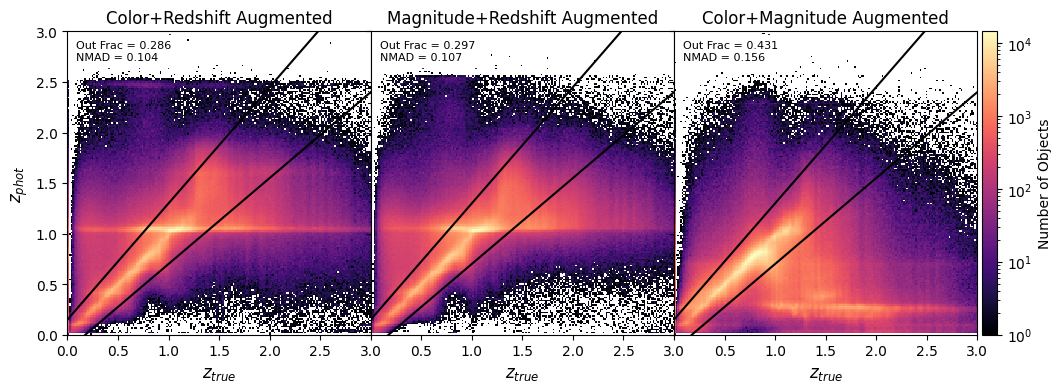

In [17]:
txt_col_red = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_col_red, 'NMAD = %.3f' % nmad_col_red)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_mag_red = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_mag_red, 'NMAD = %.3f' % nmad_mag_red)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
txt_col_mag = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac_col_mag, 'NMAD = %.3f' % nmad_col_mag)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(12,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,3),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)

h0 = grid[0].hist2d(specz, photz_col_red, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].add_artist(txt_col_red)                                
grid[0].set_xlabel(r'$z_{true}$', fontsize=12)
grid[0].set_ylabel(r'$z_{phot}$', fontsize=12)
grid[0].set_title('Color+Redshift Augmented', fontsize=12)

grid[1].hist2d(specz, photz_mag_red, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[1].plot(z_list_lo, outlier_line_lo, 'k')
grid[1].plot(z_list_hi, outlier_line_hi, 'k')
grid[1].add_artist(txt_mag_red)                                
grid[1].set_xlabel(r'$z_{true}$', fontsize=12)
grid[1].set_title('Magnitude+Redshift Augmented', fontsize=12)
grid[1].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[2].hist2d(specz, photz_col_mag, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[2].plot(z_list_lo, outlier_line_lo, 'k')
grid[2].plot(z_list_hi, outlier_line_hi, 'k')
grid[2].add_artist(txt_col_mag)                                
grid[2].set_xlabel(r'$z_{true}$', fontsize=12)
grid[2].set_title('Color+Magnitude Augmented', fontsize=12)
grid[2].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

grid[0].set_rasterized(True)
grid[1].set_rasterized(True)
grid[2].set_rasterized(True)
fig.colorbar(h0[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')

plt.savefig('augmentation_paper_plots/magshifted_flowed_training_samples/double_feature_augmentation_ztrue_vs_zphot.png', facecolor='white')
plt.savefig('augmentation_paper_plots/magshifted_flowed_training_samples/double_feature_augmentation_ztrue_vs_zphot.pdf', bbox_inches='tight')
plt.show()

# Figure 6: Color+Magnitude+Redshift Augmentation

## Unshifted colors

In [86]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
col_mag_red_aug = pd.DataFrame(pz_data['color_mag_redshift_augmented'])

In [87]:
features = pd.DataFrame(pz_data['photometry'])
specz = features['specz'].to_numpy()

In [88]:
photz = col_mag_red_aug['zphot'].to_numpy()

### calculate outlier fractions and NMADs

In [89]:
outlier = np.where(np.abs(specz-photz)/(1+specz) > 0.15)
out_frac = len(outlier[0])/len(specz)
print('color+magnitude+redshift augmented outlier fraction: ', out_frac)

color+magnitude+redshift augmented outlier fraction:  0.26781654710533076


In [90]:
photz_err = (photz-specz)/(1+specz)
med_err = np.median(photz_err)
nmad = 1.4826 * np.median(np.absolute(photz_err - med_err))
print('color+magnitude+redshift augmented NMAD: ', nmad)

color+magnitude+redshift augmented NMAD:  0.08861016109889193


In [91]:
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

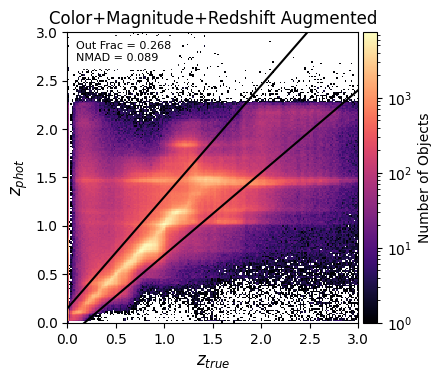

In [94]:
txt = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac, 'NMAD = %.3f' % nmad)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(4,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,1),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)

h0 = grid[0].hist2d(specz, photz, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].add_artist(txt)                                
grid[0].set_xlabel(r'$z_{true}$', fontsize=12)
grid[0].set_ylabel(r'$z_{phot}$', fontsize=12)
grid[0].set_title('Color+Magnitude+Redshift Augmented', fontsize=12)

grid[0].set_rasterized(True)
fig.colorbar(h0[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')

plt.savefig('augmentation_paper_plots/unshifted_training_samples/triple_feature_augmentation_ztrue_vs_zphot.png', facecolor='white')
plt.savefig('augmentation_paper_plots/unshifted_training_samples/triple_feature_augmentation_ztrue_vs_zphot.pdf', bbox_inches='tight')
plt.show()

## Shifted colors

In [28]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
col_mag_red_aug = pd.DataFrame(pz_data['magshifted_color_mag_redshift_augmented'])

In [29]:
features = pd.DataFrame(pz_data['photometry'])
specz = features['specz'].to_numpy()

In [30]:
photz = col_mag_red_aug['zphot'].to_numpy()

### calculate outlier fractions and NMADs

In [31]:
outlier = np.where(np.abs(specz-photz)/(1+specz) > 0.15)
out_frac = len(outlier[0])/len(specz)
print('color+magnitude+redshift augmented outlier fraction: ', out_frac)

color+magnitude+redshift augmented outlier fraction:  0.24545191721411522


In [32]:
photz_err = (photz-specz)/(1+specz)
med_err = np.median(photz_err)
nmad = 1.4826 * np.median(np.absolute(photz_err - med_err))
print('color+magnitude+redshift augmented NMAD: ', nmad)

color+magnitude+redshift augmented NMAD:  0.08350858356784176


In [33]:
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

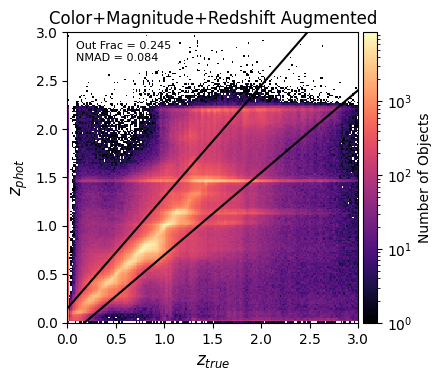

In [34]:
txt = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac, 'NMAD = %.3f' % nmad)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(4,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,1),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)

h0 = grid[0].hist2d(specz, photz, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].add_artist(txt)                                
grid[0].set_xlabel(r'$z_{true}$', fontsize=12)
grid[0].set_ylabel(r'$z_{phot}$', fontsize=12)
grid[0].set_title('Color+Magnitude+Redshift Augmented', fontsize=12)

grid[0].set_rasterized(True)
fig.colorbar(h0[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')

plt.savefig('augmentation_paper_plots/mag_shifted_training_samples/triple_feature_augmentation_ztrue_vs_zphot.png', facecolor='white', bbox_inches='tight')
plt.savefig('augmentation_paper_plots/mag_shifted_training_samples/triple_feature_augmentation_ztrue_vs_zphot.pdf', bbox_inches='tight')
plt.show()

## Flowed colors

In [18]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
col_mag_red_aug = pd.DataFrame(pz_data['magshifted_flowed_color_mag_redshift_augmented'])

In [19]:
features = pd.DataFrame(pz_data['photometry'])
specz = features['specz'].to_numpy()

In [20]:
photz = col_mag_red_aug['zphot'].to_numpy()

### calculate outlier fractions and NMADs

In [21]:
outlier = np.where(np.abs(specz-photz)/(1+specz) > 0.15)
out_frac = len(outlier[0])/len(specz)
print('color+magnitude+redshift augmented outlier fraction: ', out_frac)

color+magnitude+redshift augmented outlier fraction:  0.30365342875536777


In [22]:
photz_err = (photz-specz)/(1+specz)
med_err = np.median(photz_err)
nmad = 1.4826 * np.median(np.absolute(photz_err - med_err))
print('color+magnitude+redshift augmented NMAD: ', nmad)

color+magnitude+redshift augmented NMAD:  0.10648145239766289


In [23]:
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

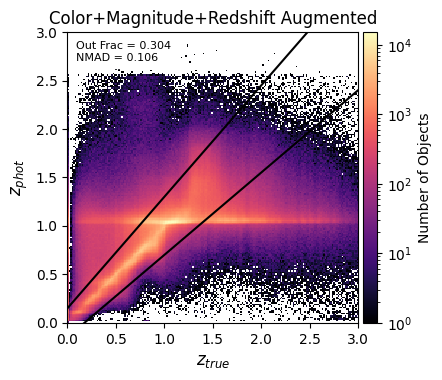

In [24]:
txt = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac, 'NMAD = %.3f' % nmad)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)

fig = plt.figure(figsize=(4,4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1,1),
                 axes_pad=0,
                 cbar_mode='single',
                 cbar_location='right',
                 cbar_pad=0.05)

h0 = grid[0].hist2d(specz, photz, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
grid[0].plot(z_list_lo, outlier_line_lo, 'k')
grid[0].plot(z_list_hi, outlier_line_hi, 'k')
grid[0].add_artist(txt)                                
grid[0].set_xlabel(r'$z_{true}$', fontsize=12)
grid[0].set_ylabel(r'$z_{phot}$', fontsize=12)
grid[0].set_title('Color+Magnitude+Redshift Augmented', fontsize=12)

grid[0].set_rasterized(True)
fig.colorbar(h0[3], cax=grid.cbar_axes[0], orientation='vertical', label='Number of Objects')

plt.savefig('augmentation_paper_plots/magshifted_flowed_training_samples/triple_feature_augmentation_ztrue_vs_zphot.png', facecolor='white')
plt.savefig('augmentation_paper_plots/magshifted_flowed_training_samples/triple_feature_augmentation_ztrue_vs_zphot.pdf', bbox_inches='tight')
plt.show()

## Unshifted colors

In [3]:
pz_file = 'augmentation_paper_plots/catalogs/fzboost_application_catalog.hdf5'

pz_data = tables_io.read(pz_file)
col_mag_red_aug = pd.DataFrame(pz_data['magshifted_redshift_augmented'])

In [4]:
features = pd.DataFrame(pz_data['photometry'])
specz = features['specz'].to_numpy()

In [5]:
photz = col_mag_red_aug['zphot'].to_numpy()

### calculate outlier fractions and NMADs

In [6]:
outlier = np.where(np.abs(specz-photz)/(1+specz) > 0.15)
out_frac = len(outlier[0])/len(specz)
print('color+magnitude+redshift augmented outlier fraction: ', out_frac)

color+magnitude+redshift augmented outlier fraction:  0.26287529041974417


In [7]:
photz_err = (photz-specz)/(1+specz)
med_err = np.median(photz_err)
nmad = 1.4826 * np.median(np.absolute(photz_err - med_err))
print('color+magnitude+redshift augmented NMAD: ', nmad)

color+magnitude+redshift augmented NMAD:  0.08787591590749651


In [8]:
z_list_lo = np.linspace(0, 3.0, 50)
z_list_hi = np.linspace(0, 3.0, 50)
outlier_line_lo = z_list_lo - 0.15*(1+z_list_lo)
outlier_line_hi = z_list_hi + 0.15*(1+z_list_hi)

<Figure size 640x480 with 0 Axes>

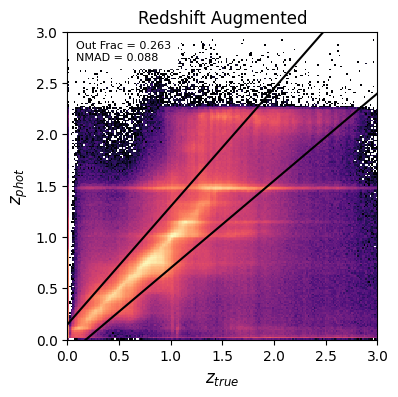

In [11]:
txt = matplotlib.offsetbox.AnchoredText('\n'.join(('Out Frac = %.3f' % out_frac, 'NMAD = %.3f' % nmad)), prop=dict(size=8, backgroundcolor='white'), borderpad=0.8, frameon=False, loc='upper left', pad=0.0)
plt.figure()
fig, ax = plt.subplots(1,1, figsize=(4,4))

ax.hist2d(specz, photz, bins=200, range=[[0,3], [0,3]], cmap='magma', cmin=1, norm=matplotlib.colors.LogNorm(), rasterized=True)
ax.plot(z_list_lo, outlier_line_lo, 'k')
ax.plot(z_list_hi, outlier_line_hi, 'k')
ax.add_artist(txt)                                
ax.set_xlabel(r'$z_{true}$', fontsize=12)
ax.set_ylabel(r'$z_{phot}$', fontsize=12)
ax.set_title('Redshift Augmented', fontsize=12)

plt.savefig('augmentation_paper_plots/mag_shifted_training_samples/redshift_augmentation_ztrue_vs_zphot.png', facecolor='white')
plt.savefig('augmentation_paper_plots/mag_shifted_training_samples/redshift_augmentation_ztrue_vs_zphot.pdf', bbox_inches='tight')
plt.show()